<a href="https://colab.research.google.com/github/bintangnabiil/Machine_Learning/blob/main/Machine_Learning_income_Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_curve, auc

# Load dataset
df = pd.read_csv('income.csv')

# Mengubah data kategorikal menjadi numerik jika diperlukan
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Pisahkan fitur dan target
y = df['income']  # Sesuaikan dengan nama kolom target pada dataset
X = df.drop(columns=['income'])

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Model K-NN

In [8]:
# Model K-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn, average='weighted')
rec_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

Model Decision Tree

In [9]:
max_depth = 5  # Batasi kedalaman pohon agar tidak terlalu kompleks
dt = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt, average='weighted')
rec_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

Print Hasil Evaluasi

In [10]:
print(f'K-NN Metrics:\nAccuracy: {acc_knn:.4f}, Precision: {prec_knn:.4f}, Recall: {rec_knn:.4f}, F1-Score: {f1_knn:.4f}')
print(f'Decision Tree Metrics:\nAccuracy: {acc_dt:.4f}, Precision: {prec_dt:.4f}, Recall: {rec_dt:.4f}, F1-Score: {f1_dt:.4f}')


K-NN Metrics:
Accuracy: 0.5103, Precision: 0.4690, Recall: 0.5103, F1-Score: 0.4783
Decision Tree Metrics:
Accuracy: 0.5798, Precision: 0.6887, Recall: 0.5798, F1-Score: 0.4811


Graph K-NN dan Decision Tree

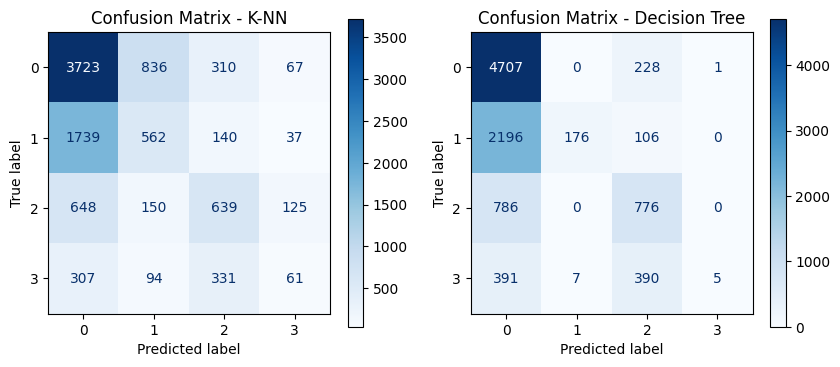

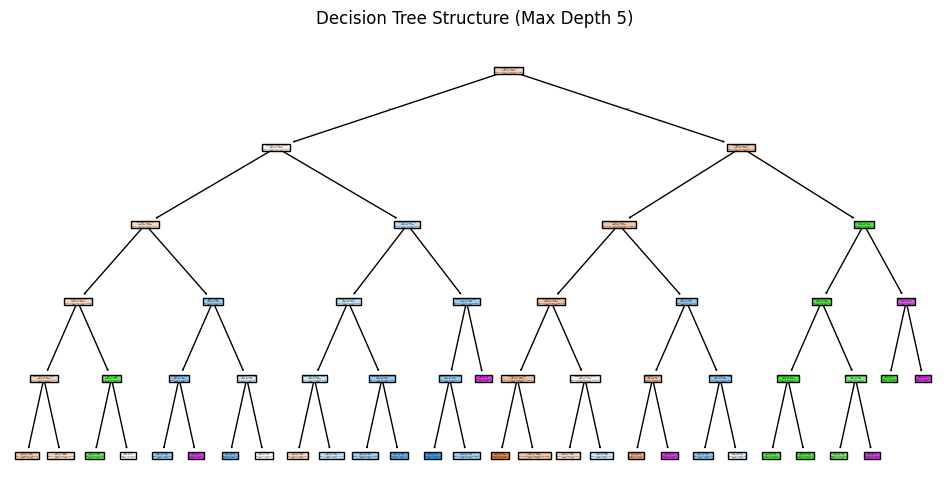

In [ ]:
# Plot Confusion Matrix for K-NN
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot(ax=plt.gca(), cmap='Blues')
plt.title('Confusion Matrix - K-NN')

# Plot Confusion Matrix for Decision Tree
plt.subplot(1, 2, 2)
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot(ax=plt.gca(), cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')

plt.show()

# Plot Decision Tree Structure dengan pembatasan kedalaman
class_names = label_encoders['income'].classes_  # Ambil nama kelas dari LabelEncoder
plt.figure(figsize=(12, 6))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=class_names, max_depth=max_depth)
plt.title("Decision Tree Structure (Max Depth 5)")
plt.show()


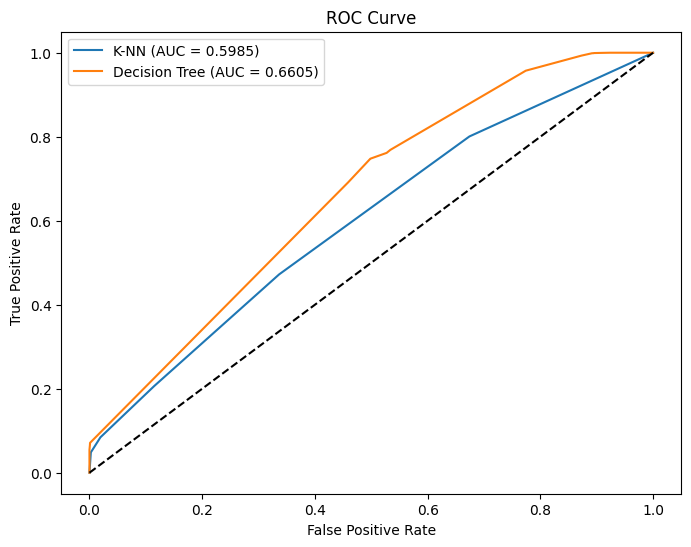

In [11]:
# ROC Curve
plt.figure(figsize=(8, 6))
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1], pos_label=1)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt.predict_proba(X_test)[:, 1], pos_label=1)
plt.plot(knn_fpr, knn_tpr, label=f'K-NN (AUC = {auc(knn_fpr, knn_tpr):.4f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {auc(dt_fpr, dt_tpr):.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#Persamaan Matematika

##1. K-Nearest Neighbors (K-NN)
K-NN bekerja dengan mengukur jarak antara titik data yang akan diklasifikasikan dengan titik data lainnya. Salah satu metrik jarak yang sering digunakan adalah jarak Euclidean:

$d(x,y) = \sqrt{\sum_{i=1}^n(x_i-y_i)^2}$

Di mana:
- $x$ dan $y$ adalah dua titik data dengan $n$ fitur.
- $x_i$ dan $y_i$ adalah nilai fitur ke-$i$ dari masing-masing titik data.
- Hasilnya adalah jarak antara dua titik dalam ruang fitur.

Jarak ini digunakan untuk menentukan tetangga terdekat dari sebuah titik uji. K-NN memilih kelas mayoritas dari $k$ tetangga terdekat. Setelah menemukan  tetangga terdekat, label kelas dari titik uji ditentukan berdasarkan mayoritas label dalam  tetangga tersebut:

$\hat{y} = arg \underset{\text{c∈C}}{\text{max}} \sum_{i∈N_k}I(y_i=c)$

Di mana:
- $\hat{y}$ = label prediksi.
- $C$ = himpunan semua kelas.
- $N_k$ = himpunan $k$ tetangga terdekat.
- $I(y_i=c)$ = indikator yang bernilai 1 jika tetangga ke-$i$ memiliki label kelas $c$, dan 0 jika tidak.


##2. Decision Tree
###a) Entropy
Entropy digunakan untuk mengukur impurity (ketidakteraturan) dalam data:

$H(S) = -\sum_{i_1}^C p_i log_2 p_i$

Di mana:
- $S$ = himpunan sampel.
- $C$ = jumlah kelas.
- $p_i$ = probabilitas suatu sampel berada di kelas $i$.
- Nilai entropy tinggi menunjukkan bahwa data sangat bercampur, sedangkan nilai rendah menunjukkan data lebih homogen.

###b) Information Gain (IG)
Information Gain digunakan untuk menentukan fitur terbaik dalam pemisahan data pada decision tree. IG didefinisikan sebagai:

$IG(S,A) = H(S) - \sum_{\text{v∈Values(A)}}\frac{|S_v|}{|S|}H(S_v)$

Di mana:
- $A$ = fitur yang digunakan untuk pemisahan.
- $Values(A)$ = himpunan nilai unik dari fitur $A$.
- $S_v$ = subset data yang memiliki nilai $v$ pada fitur $A$.
- $\frac{|S_v|}{|S|}$ = proporsi data yang masuk ke cabang tertentu.
- Semakin besar Information Gain, semakin baik fitur tersebut dalam membagi data.

###c) Gini Impurity
Alternatif lain selain entropy adalah Gini Impurity, yang digunakan dalam CART (Classification and Regression Trees):

$Gini(S) = 1-\sum_{i=1}^Cp_i^2$

Gini Impurity lebih rendah menunjukkan bahwa data lebih murni setelah pemisahan.

##3. Metrik Evaluasi
###a) Akurasi
Akurasi mengukur seberapa banyak prediksi yang benar dibandingkan total prediksi:

$Accuracy = \frac{TP+TN}{TP+TNFP+FN}$

Di mana:
- $TP$ = Prediksi positif yang benar.
- $TN$ = Prediksi negatif yang benar.
- $FP$ = Prediksi positif yang salah.
- $FN$ = Prediksi negatif yang salah.

###b) Precision, Recall, F1-Score
Precision mengukur ketepatan prediksi positif:

$Precision=\frac{TP}{TP+FP}$

Recall mengukur seberapa banyak prediksi positif yang benar dibandingkan total data positif sebenarnya:

$Recall=\frac{TP}{TP+FN}$

F1-Score adalah rata-rata harmonik antara precision dan recall:

$F1=2\times\frac{Precision \times Recall}{Precision+Recall}$

###c) ROC Curve dan AUC
ROC Curve (Receiver Operating Characteristic) menggambarkan hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR):

$TPR=\frac{TP}{TP+FN}$

$FPR=\frac{FP}{FP+TN}$

Luas di bawah kurva ROC disebut AUC (Area Under Curve), yang menunjukkan seberapa baik model membedakan kelas positif dan negatif.